
# 📊 M5.5 商業報表風格圖表製作

本課程介紹如何製作專業的商業報表風格圖表。我們將學習如何整合前面所學的各種視覺化技術，創建美觀、專業且信息豐富的商業報表。這些技能對於數據分析師在商業環境中的工作非常重要。


## 🎯 教學目標

- 📈 掌握商業報表的設計原則
- 🎨 學習專業的圖表美化技巧
- 🔄 整合多種圖表類型
- 💡 理解如何有效傳達商業洞察

In [12]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 設置中文字體
try:
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 120)

# 設置繪圖風格
plt.style.use('seaborn-v0_8-whitegrid')

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1. 生成示例數據

In [14]:
def generate_business_data():
    """生成商業報表示例數據"""
    np.random.seed(42)
    
    # 生成月度數據
    months = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
    
    data = pd.DataFrame({
        '月份': months,
        '銷售額': np.random.normal(1000000, 100000, len(months)),
        '利潤': np.random.normal(200000, 30000, len(months)),
        '客戶數': np.random.normal(5000, 500, len(months)),
        '訂單數': np.random.normal(8000, 800, len(months)),
        '客單價': np.random.normal(200, 20, len(months))
    })
    
    # 添加一些趨勢
    data['銷售額'] = data['銷售額'] + np.linspace(0, 200000, len(months))
    data['客戶數'] = data['客戶數'] + np.linspace(0, 1000, len(months))
    
    # 確保所有數值為正
    for col in ['銷售額', '利潤', '客戶數', '訂單數', '客單價']:
        data[col] = data[col].apply(lambda x: max(x, 0))
    
    return data

# 生成數據
data = generate_business_data()


## 2. 銷售趨勢圖

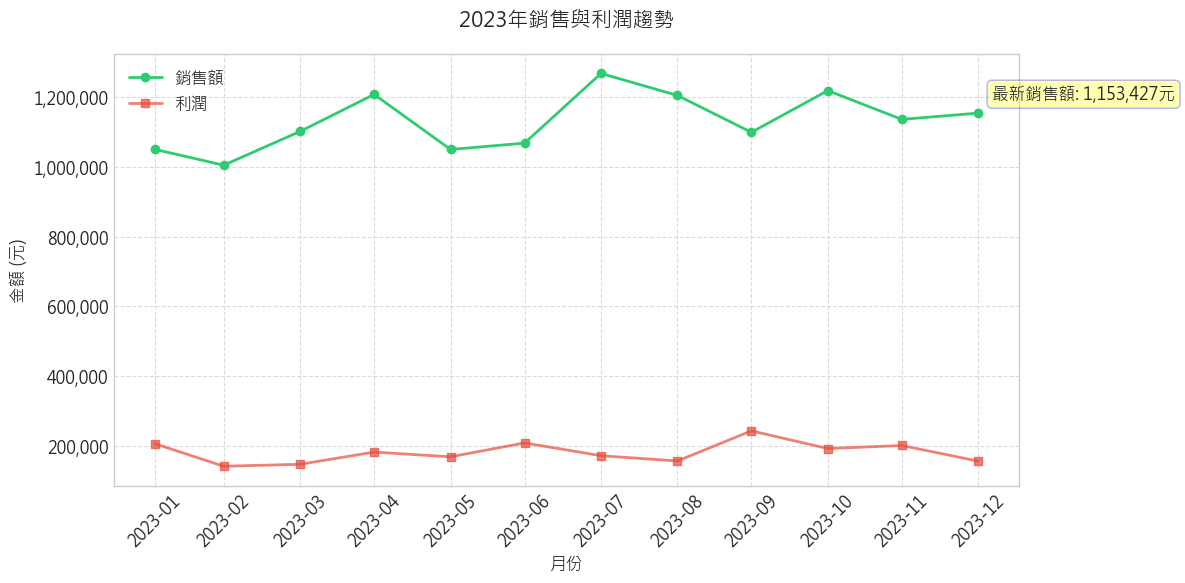

In [15]:
def sales_trend_chart():
    """創建銷售趨勢圖"""
    plt.figure(figsize=(12, 6))
    
    # 主要趨勢線
    plt.plot(data['月份'], data['銷售額'], 
             marker='o', linewidth=2, color='#2ecc71', 
             label='銷售額')
    
    # 添加利潤趨勢
    plt.plot(data['月份'], data['利潤'],
             marker='s', linewidth=2, color='#e74c3c',
             label='利潤', alpha=0.7)
    
    # 設置格式
    plt.title('2023年銷售與利潤趨勢', fontsize=15, pad=20)
    plt.xlabel('月份', fontsize=12)
    plt.ylabel('金額 (元)', fontsize=12)
    
    # 格式化y軸標籤
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # 旋轉x軸標籤
    plt.xticks(data['月份'], [d.strftime('%Y-%m') for d in data['月份']],
               rotation=45)
    
    # 添加網格
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加圖例
    plt.legend(loc='upper left')
    
    # 添加註釋
    last_sales = data['銷售額'].iloc[-1]
    plt.annotate(f'最新銷售額: {int(last_sales):,}元',
                xy=(data['月份'].iloc[-1], last_sales),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", alpha=0.3))
    
    plt.tight_layout()
    plt.show()

sales_trend_chart()


## 3. 業務KPI儀表板

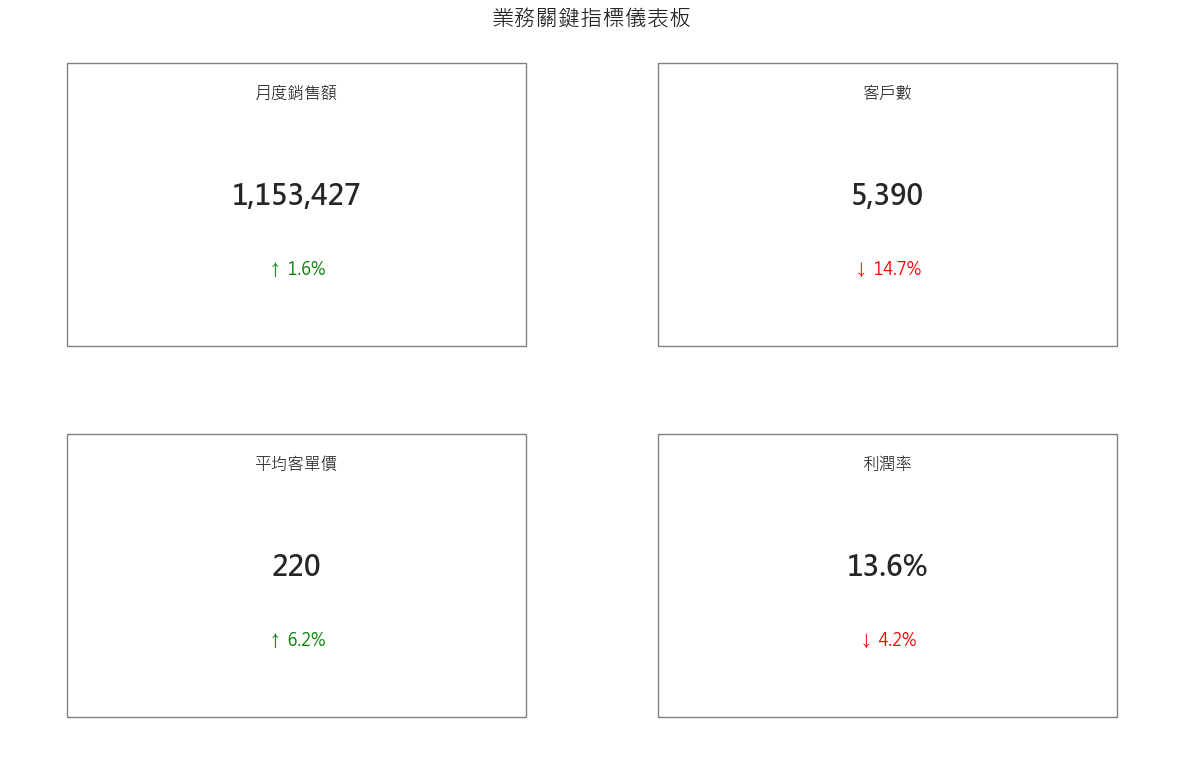

In [16]:
def kpi_dashboard():
    """創建KPI儀表板"""
    # 計算關鍵指標
    latest_data = data.iloc[-1]
    prev_data = data.iloc[-2]
    
    # 計算環比增長率
    growth_rates = {
        '銷售額': (latest_data['銷售額'] - prev_data['銷售額']) / prev_data['銷售額'] * 100,
        '客戶數': (latest_data['客戶數'] - prev_data['客戶數']) / prev_data['客戶數'] * 100,
        '客單價': (latest_data['客單價'] - prev_data['客單價']) / prev_data['客單價'] * 100,
        '利潤率': (latest_data['利潤'] / latest_data['銷售額'] * 100)
    }
    
    # 創建儀表板
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(2, 2, figure=fig)
    
    # KPI卡片
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    
    # 函數：創建KPI卡片
    def create_kpi_card(ax, title, value, growth, format_str='{:,.0f}'):
        ax.axis('off')
        
        # 標題
        ax.text(0.5, 0.8, title, ha='center', fontsize=12)
        
        # 主要數值
        ax.text(0.5, 0.5, format_str.format(value), 
               ha='center', fontsize=20, fontweight='bold')
        
        # 增長率
        color = 'green' if growth > 0 else 'red'
        arrow = '↑' if growth > 0 else '↓'
        ax.text(0.5, 0.3, f'{arrow} {abs(growth):.1f}%', 
               ha='center', fontsize=12, color=color)
        
        # 邊框
        ax.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, 
                                 fill=False, edgecolor='gray'))
    
    # 創建四個KPI卡片
    create_kpi_card(ax1, '月度銷售額', latest_data['銷售額'], growth_rates['銷售額'])
    create_kpi_card(ax2, '客戶數', latest_data['客戶數'], growth_rates['客戶數'])
    create_kpi_card(ax3, '平均客單價', latest_data['客單價'], growth_rates['客單價'])
    create_kpi_card(ax4, '利潤率', growth_rates['利潤率'], 
                   growth_rates['利潤率'] - (prev_data['利潤'] / prev_data['銷售額'] * 100),
                   '{:.1f}%')
    
    plt.suptitle('業務關鍵指標儀表板', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()

kpi_dashboard()


## 4. 銷售漏斗分析

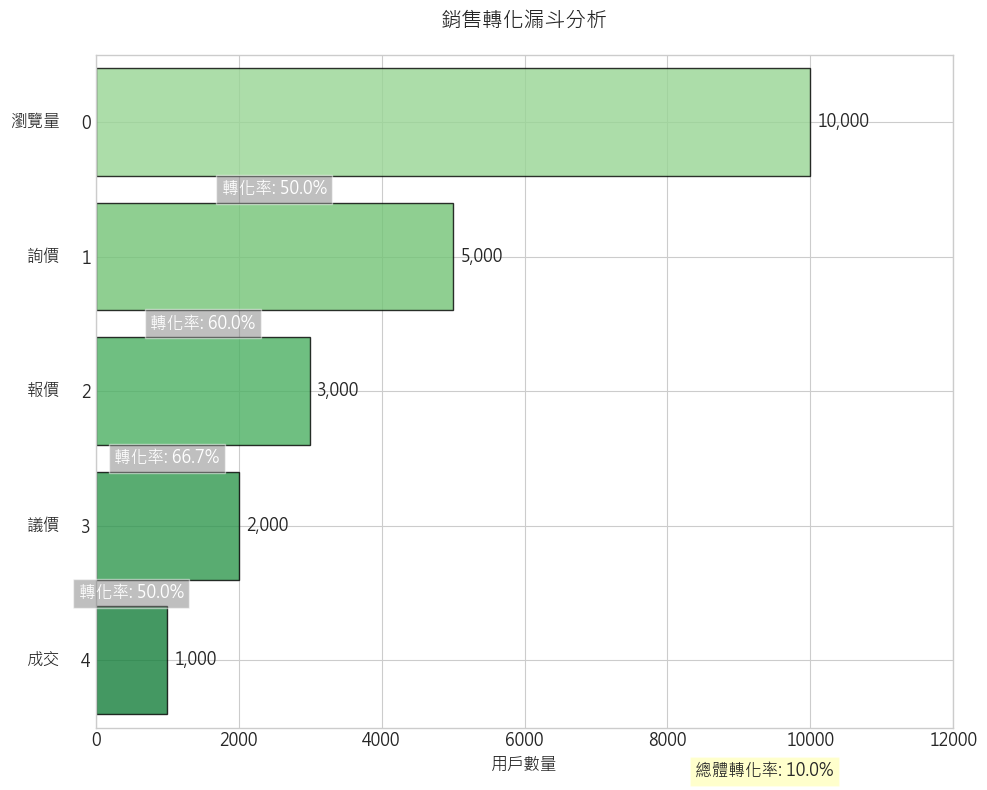

In [18]:
def sales_funnel():
    """創建銷售漏斗分析圖"""
    # 準備漏斗數據
    stages = ['瀏覽量', '詢價', '報價', '議價', '成交']
    values = [10000, 5000, 3000, 2000, 1000]
    
    # 計算轉化率
    conversion_rates = [(values[i] / values[i-1])*100 for i in range(1, len(values))]
    
    # 創建漏斗圖
    plt.figure(figsize=(10, 8))
    
    # 計算漏斗寬度
    width = np.array([0.8, 0.7, 0.6, 0.5, 0.4])
    
    # 繪製漏斗
    y_pos = np.arange(len(stages))
    colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(stages)))
    
    plt.barh(y_pos, values, height=0.8, color=colors,
             alpha=0.8, edgecolor='black', linewidth=1)
    
    # 添加標籤
    for i, (value, stage) in enumerate(zip(values, stages)):
        # 階段名稱
        plt.text(-500, i, stage, ha='right', va='center')
        # 數值
        plt.text(value + 100, i, f'{value:,}', 
                ha='left', va='center')
        # 轉化率
        if i > 0:
            plt.text(value/2, i-0.5, f'轉化率: {conversion_rates[i-1]:.1f}%',
                    ha='center', va='center', color='white',
                    bbox=dict(facecolor='gray', alpha=0.5))
    
    plt.title('銷售轉化漏斗分析', fontsize=15, pad=20)
    plt.xlabel('用戶數量', fontsize=12)
    
    # 設置軸
    plt.gca().invert_yaxis()
    plt.axis([0, max(values)*1.2, len(stages)-0.5, -0.5])
    
    # 添加總體轉化率
    overall_rate = (values[-1] / values[0]) * 100
    plt.figtext(0.7, 0.02, 
                f'總體轉化率: {overall_rate:.1f}%',
                fontsize=12, bbox=dict(facecolor='yellow', alpha=0.2))
    
    plt.tight_layout()
    plt.show()

sales_funnel()


## 5. 多維度業績分析

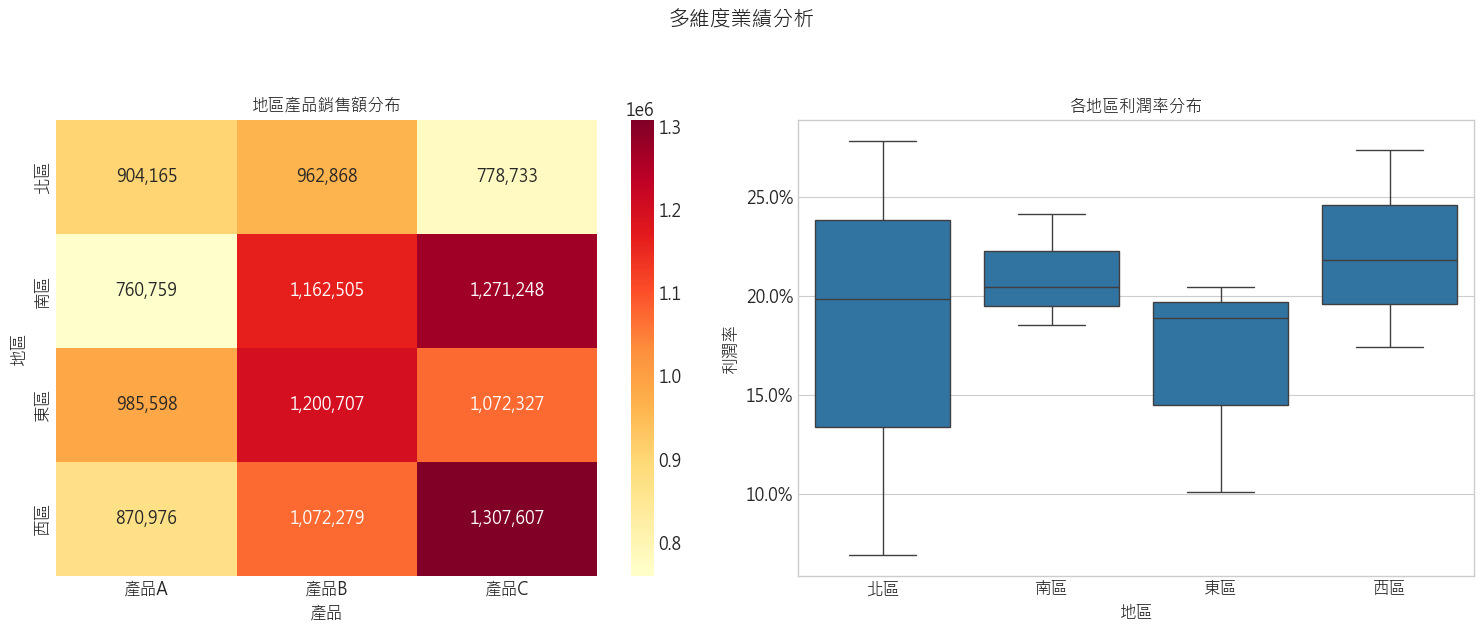

In [20]:
def multi_dimension_analysis():
    """創建多維度業績分析圖"""
    # 創建示例數據
    regions = ['北區', '南區', '東區', '西區']
    products = ['產品A', '產品B', '產品C']
    
    # 生成銷售數據
    sales_data = pd.DataFrame({
        '地區': np.repeat(regions, len(products)),
        '產品': products * len(regions),
        '銷售額': np.random.normal(1000000, 200000, len(regions) * len(products)),
        '利潤率': np.random.normal(0.2, 0.05, len(regions) * len(products))
    })
    
    # 創建子圖
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. 地區產品銷售額熱力圖
    sales_pivot = sales_data.pivot(index='地區', columns='產品', values='銷售額')
    sns.heatmap(sales_pivot, annot=True, fmt=',.0f', cmap='YlOrRd', ax=ax1)
    ax1.set_title('地區產品銷售額分布', fontsize=12)
    
    # 2. 利潤率箱型圖
    sns.boxplot(x='地區', y='利潤率', data=sales_data, ax=ax2)
    ax2.set_title('各地區利潤率分布', fontsize=12)
    ax2.set_ylabel('利潤率')
    ax2.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    
    plt.suptitle('多維度業績分析', fontsize=15, y=1.05)
    plt.tight_layout()
    plt.show()

multi_dimension_analysis()


## 6. 商業報表設計最佳實踐

在設計商業報表時，應遵循以下原則：

1. **清晰的層次結構**
   - 重要信息突出顯示
   - 邏輯性的信息排列
   - 適當的留白和間距

2. **專業的視覺設計**
   - 統一的配色方案
   - 清晰的字體選擇
   - 適當的圖表大小

3. **有效的信息傳達**
   - 突出關鍵指標
   - 清晰的數據標籤
   - 必要的註釋說明

4. **互動性考慮**
   - 適當的圖表交互
   - 靈活的篩選選項
   - 動態的數據更新


## 7. 總結

本課程介紹了商業報表製作的關鍵內容：

- **趨勢分析**：展示業務發展趨勢
- **KPI儀表板**：監控關鍵業務指標
- **漏斗分析**：理解業務轉化過程
- **多維分析**：深入業務細節洞察

這些技能對於製作專業的商業報表至關重要，能幫助我們更好地展示數據洞察，支持業務決策。